TAREA: Captura una o varias imágenes con monedas no solapadas y algún objeto que no lo sea. Filtra los contornos que no se correpondan con monedas, y muestra el número total de monedas presentes en la imagen.

# Importaciones necesarias

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



# Documentación de Código: Clase Moneda

Este bloque de código define y utiliza una clase `Moneda`, diseñada para representar diferentes denominaciones de monedas y calcular su tamaño en píxeles en base a una moneda de referencia. Esta implementación puede ser especialmente útil en contextos de procesamiento de imágenes, donde es necesario identificar y comparar monedas de diferentes denominaciones.

## Clase `Moneda`

### Atributos
- `diametros_reales`: Un diccionario de clase que contiene los diámetros reales de diferentes denominaciones de monedas.
- `nombre`: El nombre de la moneda.
- `diametro_real`: El diámetro real de la moneda, asignado durante la inicialización.
- `tamano_pixel_min`: El tamaño mínimo estimado en píxeles de la moneda.
- `tamano_pixel_max`: El tamaño máximo estimado en píxeles de la moneda.

### Métodos
- `__init__(self, nombre)`: Constructor que inicializa la moneda con el nombre proporcionado y el diámetro correspondiente.
- `calcular_tamanos(monedas, referencia_nombre, referencia_pixel)`: Método estático para calcular los tamaños en píxeles de un conjunto de monedas, basándose en una moneda de referencia.

## Uso del Código

1. Se crea una lista de instancias de `Moneda` para cada denominación disponible.
2. Se elige una moneda de referencia y se proporciona su tamaño en píxeles.
3. Se llama al método `calcular_tamanos` para calcular y asignar el tamaño en píxeles de todas las monedas en la lista.
4. Se imprimen los resultados, mostrando el nombre de cada moneda junto con su tamaño en píxeles calculado.


In [32]:
class Moneda:
    # Diccionario de diámetros reales
    diametros_reales = {
        "1 Cent": 16.25,
        "2 Cent": 18.75,
        "5 Cent": 21.25,
        "10 Cent": 19.75,
        "20 Cent": 22.25,
        "50 Cent": 24.25,
        "1 Euro": 23.25,
        "2 Euro": 25.75
    }
    
    def __init__(self, nombre):
        self.nombre = nombre
        self.diametro_real = Moneda.diametros_reales[nombre]
        self.tamano_pixel_min = None
        self.tamano_pixel_max = None

    def __str__(self):
        return f"Moneda: {self.nombre}, Tamaño en píxeles: ({self.tamano_pixel_min:.2f}, {self.tamano_pixel_max:.2f})"
    
    @staticmethod
    def crear_lista_monedas():
        return [Moneda(nombre) for nombre in Moneda.diametros_reales]

    @staticmethod
    def mostrar_lista_monedas(lista_monedas):
        print("---------------------------------")
        print(" NOMBRE | TAMAÑO MIN | TAMAÑO MAX")
        for m in lista_monedas: 
            if m.nombre in ["10 Cent", "20 Cent", "50 Cent"]:
                print(f"{m.nombre} |    {m.tamano_pixel_min:.2f}   |    {m.tamano_pixel_max:.2f}")
            else:
                print(f"{m.nombre}  |    {m.tamano_pixel_min:.2f}   |    {m.tamano_pixel_max:.2f}")
        print("---------------------------------")
    
    @staticmethod
    def calcular_tamanos(monedas, referencia_nombre, referencia_pixel):
        """Calcula el tamaño en píxeles de todas las monedas usando una moneda de referencia.
            - referencia_nombre: Nombre de la moneda de referencia
            - referencia_pixel: Tamaño en pixeles de la moneda de referencia
            - monedas: Una lista de monedas ya inicializada
        """
        margen = 5
        # Obtiene el diámetro real de la moneda de referencia
        diametro_referencia = Moneda.diametros_reales[referencia_nombre]
        
        # Factor de escala basado en el tamaño en píxeles proporcionado y el diámetro real
        factor = referencia_pixel / diametro_referencia

        for moneda in monedas:
            # Calcula el tamaño en píxeles para cada moneda usando el factor de escala
            tamano_pixel_estimado = moneda.diametro_real * factor
            moneda.tamano_pixel_min = tamano_pixel_estimado - margen
            moneda.tamano_pixel_max = tamano_pixel_estimado + margen
            

# Crea una lista de objetos Moneda a partir de los nombres de cada una
monedas =  Moneda.crear_lista_monedas()


# Calcula tamaños en píxeles del resto de monedas usando la moneda de 5 centimos con un tamaño de 75 píxeles como referencia
Moneda.calcular_tamanos(monedas, "5 Cent", 75)

# Muestra los resultados
Moneda.mostrar_lista_monedas(monedas)


---------------------------------
 NOMBRE | TAMAÑO MIN | TAMAÑO MAX
1 Cent  |    52.35   |    62.35
2 Cent  |    61.18   |    71.18
5 Cent  |    70.00   |    80.00
10 Cent |    64.71   |    74.71
20 Cent |    73.53   |    83.53
50 Cent |    80.59   |    90.59
1 Euro  |    77.06   |    87.06
2 Euro  |    85.88   |    95.88
---------------------------------


In [33]:
# Definición de una función para mostrar imagenes
def mostrar_imagen(imagen, titulo='', mostrar_ejes=False):
    """
    Muestra una imagen con un título opcional y la opción de mostrar o no los ejes.

    Parámetros:
        imagen (array): La imagen a mostrar.
        titulo (str, opcional): El título de la imagen. Por defecto es ''.
        mostrar_ejes (bool, opcional): Si es True, muestra los ejes. Por defecto es False.
    """
    plt.imshow(imagen)
    plt.title(titulo)
    if not mostrar_ejes:
        plt.axis('off')
    plt.show()

## Clasificación de monedas

CIRCULOS DETECTADOS
[[[130 114 104]
  [140 580  91]
  [142 806  90]
  [128 346  87]
  [374 118  81]
  [370 354  77]
  [370 586  75]
  [366 816  66]]]


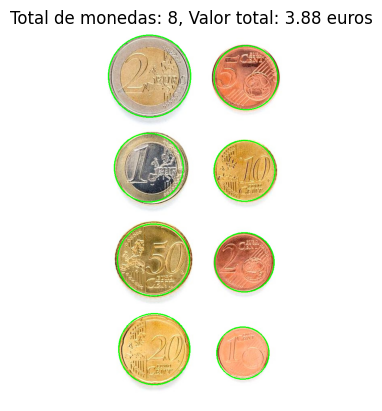

In [36]:
# Cargamos la imagen de monedas de euro
imagen = cv2.imread('Monedas.jpg')                  

# Convertimos la imagen a escala de grises
gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# Suavizamos la imagen para reducir el ruido
pimg = cv2.medianBlur(gris, 7)

# Localizamos círculos en la imagen  
circ = cv2.HoughCircles(
    pimg,  # imagen 
    cv2.HOUGH_GRADIENT,  # tipo de detección
    1,
    100,  # distancia mínima entre círculos
    param1=100, # Valor del gradiente
    param2=50, # Umbral acumulador
    minRadius=50,  # radio mínimo
    maxRadius=150,  # radio máximo
)

# Comprobamos si se han encontrado circulos en la imagen
assert circ is not None, "No se encontraron círculos en la imagen"
  
# Redondea los elementos de 'circ' al entero más cercano y los convierte a enteros sin signo de 16 bits
circ = np.uint16(np.around(circ))

print("CIRCULOS DETECTADOS")
print(circ)

# Inicializamos contadores para monedas y valor acumulado
total_monedas = 0
valor_acumulado = 0

# Preguntamos por pantalla que tipo de moneda 
# Definimos un diccionario de tamaños de monedas en píxeles
tamanos_monedas = {
    '1_cent': (60, 70),
    '2_cent': (70, 80),
    '5_cent': (80, 90),
    '10_cent': (90, 100),
    '20_cent': (100, 110),
    '50_cent': (110, 120),
    '1_euro': (120, 130),
    '2_euros': (130, 140)
}

# Recorremos los círculos detectados
for i in circ[0, :]:
    total_monedas += 1
    
    centro = (i[0], i[1])
    radio = i[2]
    # Dibujamos el círculo en la imagen original
    cv2.circle(imagen, centro, radio, (0, 255, 0), 2)
    # Comparamos el tamaño del círculo con los tamaños de las monedas
    for clave, (min_tamano, max_tamano) in tamanos_monedas.items():
        if min_tamano <= 2 * radio <= max_tamano:
            
            valor_acumulado += 2 * radio / 34  # Valor en euros basado en el tamaño

            
# Mostramos la imagen con los círculos
mostrar_imagen(imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB),
               titulo =  f'Total de monedas: {total_monedas}, Valor total: {valor_acumulado:.2f} euros'
               )





In [50]:
# Crea una lista de objetos Moneda a partir de los nombres de cada una
monedas =  Moneda.crear_lista_monedas()

monedas_contador = {
    "1 Cent": [0, 0.01],  # El primer valor (0) es la cantidad de monedas, el segundo (0.01) es el valor de cada moneda
    "2 Cent": [0, 0.02],
    "5 Cent": [0, 0.05],
    "10 Cent": [0, 0.10],
    "20 Cent": [0, 0.20],
    "50 Cent": [0, 0.50],
    "1 Euro": [0, 1.00],
    "2 Euro": [0, 2.00]
}


def clasificar_moneda(lista_monedas, borde_detectado):
    local_x, local_y, radio= borde_detectado
    diametro_target_moneda = radio*2
    # print("Clasificando Borde: ", borde_detectado)
    for moneda in lista_monedas:
        if moneda.tamano_pixel_min <= diametro_target_moneda <= moneda.tamano_pixel_max:
            print(f"Detectada moneda de {moneda.nombre} en X: {local_x} | Y: {local_y}")
    


def click_event(event, x, y, flags, params):
    global clicked_point
    if event == cv2.EVENT_LBUTTONDOWN:
        clicked_point = (x, y)
        cv2.destroyAllWindows()


# Mostrar la imagen y esperar a que el usuario haga clic
cv2.imshow('image', imagen)
cv2.setMouseCallback('image', click_event)
cv2.waitKey(0)

# Comprobar si el usuario ha hecho clic en algún punto
assert clicked_point is not None,  "No se hizo click en ningún punto"
 
# Se utiliza la variable clicked_point para saber dónde ha hecho clic el usuario
x, y = clicked_point
print(f"El usuario hizo clic en: (X: {x}, Y: {y})")

# Se determina la moneda en la que el usuario hizo clic comparando el punto de clic
# con las coordenadas y radios de los círculos detectados.
for borde in circ[0, :]:
    cx, cy, radio = borde
    if (x - cx) ** 2 + (y - cy) ** 2 <= radio ** 2:
        # Determinamos el tamaño del resto de monedas
        print("El usuario hizo click en una moneda")
        Moneda.calcular_tamanos(monedas, "1 Euro", radio*2)
        Moneda.mostrar_lista_monedas(monedas)                    
        break
else:
    print("El usuario no hizo clic dentro de ninguna moneda.")

# Finalmente clasificamos las monedas
for borde in circ[0, :]:
    clasificar_moneda(monedas, borde)



El usuario hizo clic en: (X: 139, Y: 340)
El usuario hizo click en una moneda
---------------------------------
 NOMBRE | TAMAÑO MIN | TAMAÑO MAX
1 Cent  |    116.61   |    126.61
2 Cent  |    135.32   |    145.32
5 Cent  |    154.03   |    164.03
10 Cent |    142.81   |    152.81
20 Cent |    161.52   |    171.52
50 Cent |    176.48   |    186.48
1 Euro  |    169.00   |    179.00
2 Euro  |    187.71   |    197.71
---------------------------------
Detectada moneda de 50 Cent en X: 140 | Y: 580
Detectada moneda de 50 Cent en X: 142 | Y: 806
Detectada moneda de 1 Euro en X: 128 | Y: 346
Detectada moneda de 5 Cent en X: 374 | Y: 118
Detectada moneda de 20 Cent en X: 374 | Y: 118
Detectada moneda de 10 Cent en X: 370 | Y: 586


TAREA: Captura una o varias imágenes con monedas no solapadas, y otras con monedas solapadas. Identificada una moneda de un euro en la imagen, por ejemplo con un clic de ratón, calcular la cantidad de dinero presente en la imagen. ¿Qué problemas han observado?




Clasificación de microplásticos

In [ ]:
#Cargamos tres subimágenes de cada uno de los tres tipos considerados (el alquitrán efectivamenet no es microplástico)
imgF = cv2.imread('FRA.png') 
imgP = cv2.imread('PEL.png') 
imgT = cv2.imread('TAR.png') 

#Mostramos
plt.subplot(131)
plt.axis("off")
plt.imshow(imgF) 
plt.title('Fragmentos')
plt.subplot(132)
plt.axis("off")
plt.imshow(imgP) 
plt.title('Pellet')
plt.subplot(133)
plt.axis("off")
plt.imshow(imgT) 
plt.title('Alquitrán')
plt.show()

TAREA: Estas tres imágenes han sido extraidas de las imágenes de mayor tamaño contenidas en la carpeta. Determina patrones geométricos para cada una de las tres clases y evalúa los aciertos y fallos con las imágenes completas la matriz de confusión. Para cada clase, determina el número de muestras que se clasifican correctamente de dicha clase, y el número de muestras que se clasifica incorrectamente por cada una de las otras dos clases.

El el trabajo [SMACC: A System for Microplastics Automatic Counting and Classification](https://doi.org/10.1109/ACCESS.2020.2970498), las características geométricas utilizadas en dicho trabajo fueron:

- Área en píxeles
- Perímetro en píxeles
- Compacidad (relación del cuadrado del perímetro con el área)
- Relación del área con la del contenedor
- Relación del ancho y el alto del contenedor
- Relación entre los ejes de la elipse ajustada
- Definido el centroide, relación entre las distancias menor y mayor al contorno

Si no se quedan satisfechos con la segmentación obtenida, es el mundo real, también en el README comento técnicas recientes de segmentación, que podrían despertar su curiosidad.

Las métricas se utilizan para mostrar la bondad de un clasificador, la siguiente celda obtiene varias para un conjunto de datos imaginario (y con etiquetas aleatorias). Si bien las trataremos con más detalle en teoría, muestro un repertorio de ellas, dando más peso a la matriz de confusión.

¿Qué es una matriz de confusión?
Se utiliza para mostrar el comportamiento de un clasificador par alas distintas clases consideradas, se relacionan las etiquetas de las muestras anotadas frente a las predichas por el clasificador. Se busca una matriz diagonal, pero la perfección es infrecuente

In [ ]:

import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)


# Numero de muestras
n = 100  
nclases = 4

# A falta de clasificador y conjunto de datos, creamos anotaciones y predicciones de forma aleatoria
# Vector aleatorio con etiquetas anotadas
y = [random.randint(0, nclases - 1) for _ in range(n)]

# Vector aleatorio con etiquetas predichas por un supuesto clasificador
y_pred = [random.randint(0, nclases - 1) for _ in range(n)]


accuracy = accuracy_score(y, y_pred)
#Para más de una clase se define la forma de promediar
precision = precision_score(y, y_pred,average='weighted')
recall = recall_score(y, y_pred,average='weighted')
f1score = f1_score(y, y_pred,average='weighted')

print(f"Accuracy (TP/(n))= {accuracy}")
print(f"Precision (TP/(TP+FP)) = {precision}")
print(f"Recall (TP/(TP+FN)) = {recall}")
print(f"F1 Score (2*(precision*recall)/(precision+recall)) = {f1score}")


conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8,8))
sns.set(font_scale = 1.75)#tamaños tipografía
sns.set(font_scale = 3.0)

ax = sns.heatmap(
        conf_matrix, # confusion matrix 2D array 
        annot=True, # Muestra números en las celdas
        fmt='d', # valores enteros
        cbar=False, # sin barra de colores
        cmap='flag', # mapa de colores
        #vmax=175 # contraste de color
    )

#Etiquetas matriz de confusión
label_font = {'size':'25'}
ax.set_xlabel("Predicha", labelpad=-0.75, fontdict=label_font)
ax.set_ylabel("Anotada", labelpad=20, fontdict=label_font)